# Data Science 2 - ESEO DSMT - Cyrielle Albert

## Project : ClassificationProject - Risques Cardio Vasculaires (RCV)_S9

#### Bonus: +2.5

Starting from this template you should add the following modifications:\
**3.** Create the list **numerical_featuresBIN** and link it to a pipeline containing an Imputing strategy. Finally, include this pipeline in the preprocessor (0.25 points).
\
**4b.** Complete the CrossValidation  adding  CLASSIFICATION models based en ENSEMBLE LEARNING (bagging and boosting) studied in S9 and compare the results (0.25 points).
\
**5a.** Apply TUNING and EARLY STOPPING  to xgBoost and LightGBM models (0.5 points).\
**5b.** Apply Features Selection methods such as **Select K Best** and **Select From Model** (the last one for xgBoost LightGBM models only) and test  new performances (1 points).
\
**6.** Compare results in **4b**, **5**, **5b** and select your final model and your final Data Base,train the model again and print the final score. Implement a final TUNING if necessary. Comment the final results (0.5 points).

\
**IMPORTANT**: the Notebook should contain the final versions of your algorithm, all intermediate prototyping must be declared in an Annex commented section.

## 0. Load Libraries

In [2]:
import numpy as np  # MATLAB->matrix
import pandas as pd  ##R-> dataframe
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt #MATLAB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## 1. Load Data

In [3]:
df=pd.read_csv('datasetRCV.csv')

## 2. Analyze and visualize data

In [4]:
print(df.shape)
print(df.dtypes)
df.head(5)

(499, 11)
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
target                 int64
dtype: object


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,target
0,Male,5.0,0,0,No,children,Urban,82.41,18.4,Unknown,0
1,Male,9.0,0,0,No,children,Rural,76.88,18.0,Unknown,0
2,Male,44.0,0,0,Yes,Private,Urban,142.31,29.1,smokes,0
3,Female,52.0,0,1,Yes,Private,Urban,85.66,39.4,never smoked,0
4,Male,78.0,0,0,Yes,Self-employed,Rural,93.85,22.7,formerly smoked,0


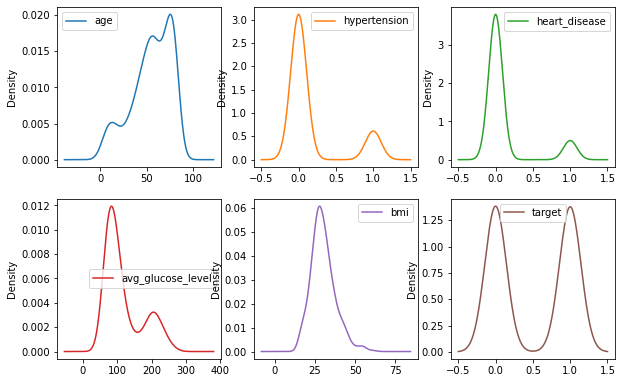

In [8]:
df.plot(kind='density',subplots=True,sharex=False,layout=(3,3),figsize=(10,10));

## 3.  Prepare Data:  Data Cleaning and Data Transforms

In [9]:
X=df.drop('target',axis=1)
y=df['target'];
y.value_counts()

0    250
1    249
Name: target, dtype: int64

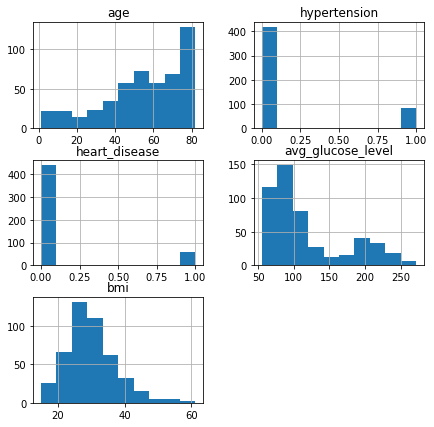

In [10]:
X.hist(figsize=(7,7));

In [11]:
numerical_features=['age','avg_glucose_level','bmi']
categorical_features=['gender','ever_married','work_type','Residence_type','smoking_status']
numerical_featuresBIN=["hypertension","heart_disease"];

In [12]:
numerical_pipeline=make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
categorical_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder())
numerical_featuresBIN_pipeline=(SimpleImputer(strategy="most_frequent"));

In [13]:
preprocessor=make_column_transformer((numerical_pipeline,numerical_features),(categorical_pipeline,categorical_features),
                                     (numerical_featuresBIN_pipeline,numerical_featuresBIN))

 ## 4. Evaluate Algorithms
### a) Train test split
### b) Cross validation
### c) Compare Algorithms


In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [25]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [22]:
#4.a
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.2,random_state=0)

In [29]:
#4.b
seed=0
pipelines=[]
pipelines.append(('LR',make_pipeline(preprocessor,LogisticRegression(random_state=seed))))
pipelines.append(('SVC',make_pipeline(preprocessor,SVC(random_state=seed))))
pipelines.append(('DT',make_pipeline(preprocessor,DecisionTreeClassifier(random_state=seed))))
pipelines.append(('BaggingTree',make_pipeline(preprocessor,BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=seed),random_state=seed))))
pipelines.append(('RandomForest',make_pipeline(preprocessor,RandomForestClassifier(random_state=seed))))
pipelines.append(('Extratrees',make_pipeline(preprocessor,ExtraTreesClassifier(random_state=seed))))
pipelines.append(('AdaBoost', make_pipeline(preprocessor,AdaBoostClassifier(random_state=seed))))
pipelines.append(('GradientBoosting',make_pipeline(preprocessor,GradientBoostingClassifier(random_state=seed))))
pipelines.append(('XGBoost',make_pipeline(preprocessor,XGBClassifier(random_state=seed,verbosity = 0))))
pipelines.append(('LGBM',make_pipeline(preprocessor,LGBMClassifier(random_state=seed))))

In [30]:
#4.b
results=[]
names=[]
num_folds=5
scoring='accuracy'

for name, model in pipelines:
    kfold=KFold(n_splits=num_folds)
    cv_results=cross_val_score(model, X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)




LR: 0.761899 (0.025029)
SVC: 0.754367 (0.020504)
DT: 0.651582 (0.034364)
BaggingTree: 0.726899 (0.028229)
RandomForest: 0.754399 (0.014745)
Extratrees: 0.681772 (0.022270)
AdaBoost: 0.739272 (0.015958)
GradientBoosting: 0.726867 (0.020872)
XGBoost: 0.701741 (0.021647)
LGBM: 0.724430 (0.041915)


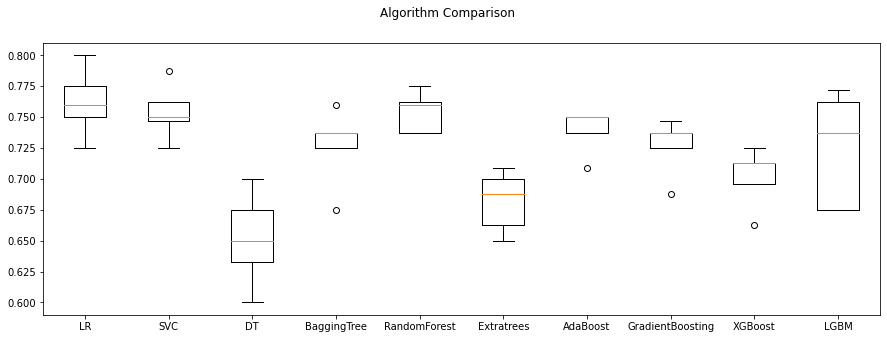

In [33]:
fig, ax =plt.subplots(figsize=((15,5)));
plt.boxplot(results);
ax.set_xticklabels(names);
fig.suptitle('Algorithm Comparison');

## 5. Improve Accuracy: tuning

In [16]:
### SVC tuning at Home
#LR Tuning

#### 5.a.1 Tuning on Logistic Regression

In [17]:
y_hat=make_pipeline(preprocessor,LogisticRegression(random_state=seed))
y_hat.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['age', 'avg_glucose_level', 'bmi']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder())]),
                                    ['gender', 'ever_married', 'work_type',
                                     'Residence_type', 'smoking_status'])])),
  ('logisticregression', Log

In [128]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


In [19]:
params = {
    
    'logisticregression__C' : np.linspace(0.5,10,40),
    'logisticregression__max_iter' : [100,200,500],
    #'logisticregression__penalty': ['l2','none']
  
}

In [20]:
y_hat_grid=GridSearchCV(y_hat,param_grid=params,cv=5)

In [21]:
y_hat_grid.fit(X_train,y_train);

In [22]:
print("Best: %f using %s" % (y_hat_grid.best_score_,y_hat_grid.best_params_))#BEST accuracy sur partition TRAIN

Best: 0.779367 using {'logisticregression__C': 1.2307692307692308, 'logisticregression__max_iter': 100}


#### 5.a.2 Tuning and Early Stopping on XGBClassifier

In [164]:
# early Stopping 
model = XGBClassifier(n_estimators=50,random_state=seed)

preprocessor.fit_transform(X_train,y_train)
y_hat_2 = make_pipeline(preprocessor, model)

X_test_prepro = preprocessor.transform(X_test) # Preprocessing of eval set
y_hat_2.fit(X_train,y_train,xgbclassifier__eval_metric="auc",xgbclassifier__eval_set=[(X_test_prepro,y_test)],xgbclassifier__early_stopping_rounds=10);

[0]	validation_0-auc:0.85394
[1]	validation_0-auc:0.87355
[2]	validation_0-auc:0.88015
[3]	validation_0-auc:0.88355
[4]	validation_0-auc:0.88115
[5]	validation_0-auc:0.89396
[6]	validation_0-auc:0.89596
[7]	validation_0-auc:0.88996
[8]	validation_0-auc:0.89616
[9]	validation_0-auc:0.90016
[10]	validation_0-auc:0.90096
[11]	validation_0-auc:0.90136
[12]	validation_0-auc:0.89736
[13]	validation_0-auc:0.89936
[14]	validation_0-auc:0.90096
[15]	validation_0-auc:0.90136
[16]	validation_0-auc:0.90176
[17]	validation_0-auc:0.90156
[18]	validation_0-auc:0.90316
[19]	validation_0-auc:0.90356
[20]	validation_0-auc:0.90356
[21]	validation_0-auc:0.90436
[22]	validation_0-auc:0.90796
[23]	validation_0-auc:0.90796
[24]	validation_0-auc:0.90516
[25]	validation_0-auc:0.90516
[26]	validation_0-auc:0.90636
[27]	validation_0-auc:0.90396
[28]	validation_0-auc:0.90076
[29]	validation_0-auc:0.90316
[30]	validation_0-auc:0.90436
[31]	validation_0-auc:0.90756


In [167]:
print("model best score",y_hat_2['xgbclassifier'].best_score)
print("model_best_iteration",y_hat_2['xgbclassifier'].best_iteration)
print("model ntree limit:",y_hat_2['xgbclassifier'].best_ntree_limit)

model best score 0.907963
model_best_iteration 22
model ntree limit: 23


In [118]:
# Tuning 

param_grid = {
    'xgbclassifier__max_depth':[4,6,8,10,20,25],
    'xgbclassifier__scale_pos_weight':[1,3,5,10],
    'xgbclassifier__subsample':[0.5,0.75,1],
    'xgbclassifier__colsample_bytree':[0.4,0.6,0.8,1],
    'xgbclassifier__learning_rate':[0.01,0.05,0.1],
    'xgbclassifier__min_child_weight':[1,3,5]
}

In [133]:
y_hat_grid = RandomizedSearchCV(y_hat_2, param_grid,scoring='roc_auc',cv=10,n_iter=20,random_state=seed)
y_hat_grid.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['age', 'avg_glucose_level', 'bmi']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder())]),
                                    ['gender', 'ever_married', 'work_type',
                                     'Residence_type

In [171]:
y_hat_grid.fit(X_train,y_train,xgbclassifier__eval_metric='logloss');

In [172]:
print("model best score: ",y_hat_grid.best_score_)
print("model best params: ",y_hat_grid.best_params_)

model best score:  0.8402368421052631
model best params:  {'xgbclassifier__subsample': 0.75, 'xgbclassifier__scale_pos_weight': 1, 'xgbclassifier__min_child_weight': 5, 'xgbclassifier__max_depth': 20, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__colsample_bytree': 0.6}


#### 5.a.2 Tuning and Early Stopping on LGBMClassifier

In [142]:
model = LGBMClassifier(n_estimators=50,random_state=seed,)

preprocessor.fit_transform(X_train,y_train)
y_hat_3 = make_pipeline(preprocessor, model)

X_test_prepro = preprocessor.transform(X_test) # Preprocessing of eval set
y_hat_3.fit(X_train,y_train,lgbmclassifier__eval_metric="auc",lgbmclassifier__eval_set=[(X_test_prepro,y_test)],lgbmclassifier__early_stopping_rounds=20);

[1]	valid_0's auc: 0.856743	valid_0's binary_logloss: 0.653221
[2]	valid_0's auc: 0.861144	valid_0's binary_logloss: 0.618549
[3]	valid_0's auc: 0.87475	valid_0's binary_logloss: 0.59126
[4]	valid_0's auc: 0.882353	valid_0's binary_logloss: 0.566806
[5]	valid_0's auc: 0.887155	valid_0's binary_logloss: 0.545768
[6]	valid_0's auc: 0.894358	valid_0's binary_logloss: 0.527286
[7]	valid_0's auc: 0.894758	valid_0's binary_logloss: 0.511182
[8]	valid_0's auc: 0.898559	valid_0's binary_logloss: 0.497462
[9]	valid_0's auc: 0.89896	valid_0's binary_logloss: 0.485654
[10]	valid_0's auc: 0.898559	valid_0's binary_logloss: 0.473185
[11]	valid_0's auc: 0.897759	valid_0's binary_logloss: 0.465164
[12]	valid_0's auc: 0.89916	valid_0's binary_logloss: 0.456535
[13]	valid_0's auc: 0.89956	valid_0's binary_logloss: 0.448195
[14]	valid_0's auc: 0.90116	valid_0's binary_logloss: 0.439914
[15]	valid_0's auc: 0.902761	valid_0's binary_logloss: 0.434002
[16]	valid_0's auc: 0.902761	valid_0's binary_logloss: 

In [177]:
print("model best score (logloss): ",y_hat_3['lgbmclassifier'].best_score_['valid_0']['binary_logloss'])
print("model best score (auc): ",y_hat_3['lgbmclassifier'].best_score_['valid_0']['auc'])
print("model best iteration: ",y_hat_3['lgbmclassifier'].best_iteration_)

model best score (logloss):  0.4215162639057651
model best score (auc):  0.9039615846338536
model best iteration:  18


In [180]:
param_grid = {
    "lgbmclassifier__boosting_type":['gbdt','rf'],
    'lgbmclassifier__max_depth':[4,6,8,10],
    'lgbmclassifier__scale_pos_weight':[1,3,5],
    'lgbmclassifier__subsample':[0.5,0.75,1],
    'lgbmclassifier__colsample_bytree':[0.4,0.6,0.8,1],
    'lgbmclassifier__learning_rate':[0.01,0.05,0.1],
    'lgbmclassifier__min_child_weight':[1,3,5],
    "lgbmclassifier__subsample_for_bin":[2000]
}

In [184]:
y_hat_grid_3 = RandomizedSearchCV(y_hat_3, param_grid,scoring='roc_auc',cv=10,n_iter=20,random_state=seed)
y_hat_grid_3.fit(X_train,y_train,lgbmclassifier__eval_metric='auc');

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "D:\Anaconda\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "D:\Anaconda\lib\site-packages\lightgbm\engine.py", line 271, in train
    booster = Booster(params=params, train_set=train_set)
  File "D:\Anaconda\lib\site-packages\lightgbm\basic.

In [185]:
print("model best score: ",y_hat_grid_3.best_score_)
print("model best params: ",y_hat_grid_3.best_params_)

model best score:  0.8316466165413534
model best params:  {'lgbmclassifier__subsample_for_bin': 2000, 'lgbmclassifier__subsample': 1, 'lgbmclassifier__scale_pos_weight': 5, 'lgbmclassifier__min_child_weight': 5, 'lgbmclassifier__max_depth': 10, 'lgbmclassifier__learning_rate': 0.01, 'lgbmclassifier__colsample_bytree': 0.8, 'lgbmclassifier__boosting_type': 'gbdt'}


#### 5.b.1 Feature Selection (Select K Best) on Logistic Regression (Ne fonctionne pas)

In [188]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [278]:
cat_preprocessor = make_column_transformer((categorical_pipeline,categorical_features))
cat_selector = make_pipeline(cat_preprocessor,SelectKBest(chi2,k=2))
cat_selector.fit_transform(X_train[categorical_features],y_train)

num_preprocessor = make_column_transformer((numerical_pipeline,numerical_features))
num_selector = make_pipeline(num_preprocessor,SelectKBest(f_classif,k=3))
num_selector.fit_transform(X_train[numerical_features],y_train)

num_preprocessorBIN = make_column_transformer((numerical_featuresBIN_pipeline,numerical_featuresBIN))
num_selectorBIN = make_pipeline(num_preprocessorBIN,SelectKBest(chi2,k=2))
num_selector.fit_transform(X_train[numerical_featuresBIN],y_train)


ValueError: A given column is not a column of the dataframe

#### 5.b.2 Feature Selection on XGB Regressor


In [233]:
model = make_pipeline(preprocessor, XGBClassifier(importance_type='weight',random_seed=seed))
model.fit(X_train,y_train,xgbclassifier__eval_metric='logloss')
print("Score: ",model.score(X_test,y_test))

Score:  0.81


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

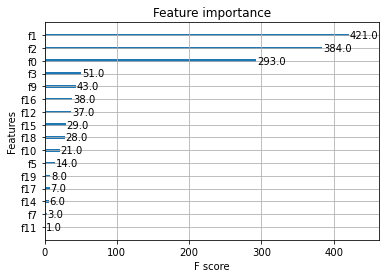

In [234]:
from xgboost import plot_importance
plot_importance(model["xgbclassifier"],importance_type='weight')

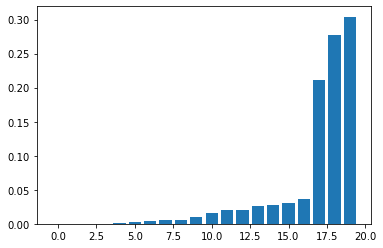

In [236]:
thresholds = np.sort(model['xgbclassifier'].feature_importances_)
plt.bar(range(len(thresholds)),thresholds);

In [255]:
from sklearn.feature_selection import SelectFromModel
X_train_prepro = preprocessor.fit_transform(X_train)
X_test_prepro = preprocessor.transform(X_test)
for threshold in thresholds:
    selection = SelectFromModel(model['xgbclassifier'],threshold=threshold,prefit=False)#feature selection
    selection.fit(X_train_prepro,y_train)
    #Transform X_train
    select_X_train = selection.transform(X_train_prepro)
    
    #train X_train
    selection_model = model['xgbclassifier']
    selection_model.fit(select_X_train,y_train,eval_metric='logloss')
    
    #Evaluation Test
    select_X_test = selection.transform(X_test_prepro)
    accuracy = selection_model.score(select_X_test,y_test)
    print("Thresholds:",threshold)
    print("nFeature:",select_X_train.shape[1])
    print("accuracy:",accuracy, "\n")
    

Thresholds: 0.0
nFeature: 20
accuracy: 0.81 

Thresholds: 0.0
nFeature: 20
accuracy: 0.81 

Thresholds: 0.0
nFeature: 20
accuracy: 0.81 

Thresholds: 0.0
nFeature: 20
accuracy: 0.81 

Thresholds: 0.00072254334
nFeature: 16
accuracy: 0.81 

Thresholds: 0.00216763
nFeature: 15
accuracy: 0.8 

Thresholds: 0.00433526
nFeature: 14
accuracy: 0.77 

Thresholds: 0.0050578034
nFeature: 13
accuracy: 0.82 

Thresholds: 0.0057803467
nFeature: 12
accuracy: 0.78 

Thresholds: 0.010115607
nFeature: 11
accuracy: 0.78 

Thresholds: 0.01517341
nFeature: 10
accuracy: 0.81 

Thresholds: 0.020231213
nFeature: 9
accuracy: 0.78 

Thresholds: 0.020953758
nFeature: 8
accuracy: 0.79 

Thresholds: 0.026734104
nFeature: 7
accuracy: 0.77 

Thresholds: 0.027456647
nFeature: 6
accuracy: 0.8 

Thresholds: 0.031069364
nFeature: 5
accuracy: 0.77 

Thresholds: 0.03684971
nFeature: 4
accuracy: 0.79 

Thresholds: 0.21170521
nFeature: 3
accuracy: 0.79 

Thresholds: 0.27745664
nFeature: 2
accuracy: 0.64 

Thresholds: 0.3041

#### 5.b.2 Feature Selection on LGBM Regressor


In [268]:
model = make_pipeline(preprocessor, LGBMClassifier(importance_type='split',random_seed=seed))
model.fit(X_train,y_train,lgbmclassifier__eval_metric='logloss')
print("Score: ",model.score(X_test,y_test))

Score:  0.8


In [269]:
from lightgbm import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

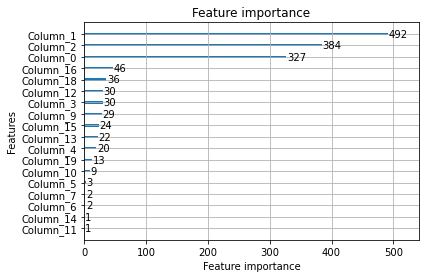

In [270]:
plot_importance(model['lgbmclassifier'],importance_type='split')

In [271]:
thresholds = np.sort(model['lgbmclassifier'].feature_importances_)

for threshold in thresholds:
    selection = SelectFromModel(model['lgbmclassifier'],threshold=threshold,prefit=False)#feature selection
    selection.fit(X_train_prepro,y_train)
    #Transform X_train
    select_X_train = selection.transform(X_train_prepro)
    
    #train X_train
    selection_model = model['lgbmclassifier']
    selection_model.fit(select_X_train,y_train,eval_metric='logloss')
    
    #Evaluation Test
    select_X_test = selection.transform(X_test_prepro)
    accuracy = selection_model.score(select_X_test,y_test)
    print("Thresholds:",threshold)
    print("nFeature:",select_X_train.shape[1])
    print("accuracy:",accuracy, "\n")
    

Thresholds: 0
nFeature: 20
accuracy: 0.8 

Thresholds: 0
nFeature: 20
accuracy: 0.8 

Thresholds: 1
nFeature: 18
accuracy: 0.8 

Thresholds: 1
nFeature: 18
accuracy: 0.8 

Thresholds: 2
nFeature: 16
accuracy: 0.78 

Thresholds: 2
nFeature: 16
accuracy: 0.78 

Thresholds: 3
nFeature: 14
accuracy: 0.78 

Thresholds: 9
nFeature: 13
accuracy: 0.79 

Thresholds: 13
nFeature: 12
accuracy: 0.78 

Thresholds: 20
nFeature: 11
accuracy: 0.79 

Thresholds: 22
nFeature: 10
accuracy: 0.79 

Thresholds: 24
nFeature: 9
accuracy: 0.79 

Thresholds: 29
nFeature: 8
accuracy: 0.83 

Thresholds: 30
nFeature: 7
accuracy: 0.78 

Thresholds: 30
nFeature: 7
accuracy: 0.78 

Thresholds: 36
nFeature: 5
accuracy: 0.78 

Thresholds: 46
nFeature: 4
accuracy: 0.76 

Thresholds: 327
nFeature: 3
accuracy: 0.78 

Thresholds: 384
nFeature: 2
accuracy: 0.59 

Thresholds: 492
nFeature: 1
accuracy: 0.64 



#### Observation :
After tuning and feature selection, the **XGBoostClassifier** seems to be the best classifier for this problem even if the LGBMClassifier seems to be great too. 

## 6. Finalize Model
###  a) Final choice XGBoost Classifier
###  b) Final training and score


In [275]:
y_hat_final=make_pipeline(preprocessor,XGBClassifier(subsample=0.75,
                                                     n_estimators=50,
                                                     scale_pos_weight=1,
                                                     min_child_weight=5,
                                                     max_depth=20,
                                                     learning_rate=0.05,
                                                     colsample_bytree=0.6))# Result of a randomized search CV

In [276]:
y_hat_final.fit(X_train,y_train);

In [277]:
y_hat_final.score(X_test,y_test) ## accuracy sur partition TEST

0.78